# Data Science PROJECT
Client: No-Churn Telecom | Category: Telecom – Churn Rate ML

### Business Case:
No-Churn Telecom is an establish Telecom operation in Europewith 
more than a decade in Business. Due to new players in the Market, 
telecom industry has become very competitive and retaining 
customers becoming challenge.
In spite of No-Churn initiative for reducing tariffs and promoting 
more offers, the churn rate (percentage of customers migratingto 
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help 
with following use cases to retain competitive edge in the industry.

#### PROJECT GOAL
Help No-Churn with their use cases with ML
1. Understanding the variables that influencing the customersto 
migrate.
2. Creating Churn risk scores that can be indicative to drive 
retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values 
YES(1) or NO(0) so that email campaigns with lucrative offers 
can be targets to Churn YES customers.
4. Exporting the trained model with prediction capability for 
CHURN-FLAG Highlights the flag (with input variables 
documents) that can be integration with internal application
help to identify possible CHURN-FLAG YES customers and provide 
more attention in customer touch point areas, including customer 
care support, request fulfilment, auto categorizing tickets as high 
priority for quick resolutions any questions they may have etc.,

In [1]:
#importing required libraries

In [2]:
import numpy as np #linear library
import pandas as pd #data processing reading files of csv and excel files
#data visualization and ploting the data
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
telecom=pd.read_csv("C:\\Users\\HP\\Downloads\\Telecom Churn\\telecom_churn_data.csv")

In [5]:
telecom.head()

,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [6]:
telecom.shape

(4616, 21)

In [7]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KS         4616 non-null   object 
 1    128       4616 non-null   int64  
 2    415       4616 non-null   int64  
 3    382-4657  4616 non-null   object 
 4    no        4616 non-null   object 
 5    yes       4616 non-null   object 
 6    25        4616 non-null   int64  
 7    265.1     4616 non-null   float64
 8    110       4616 non-null   int64  
 9    45.07     4616 non-null   float64
 10   197.4     4616 non-null   float64
 11   99        4616 non-null   int64  
 12   16.78     4616 non-null   float64
 13   244.7     4616 non-null   float64
 14   91        4616 non-null   int64  
 15   11.01     4616 non-null   float64
 16   10        4616 non-null   float64
 17   3         4616 non-null   int64  
 18   2.7       4616 non-null   float64
 19   1         4616 non-null   int64  
 20   False. 

In [8]:
telecom.isnull().sum()

KS           0
 128         0
 415         0
 382-4657    0
 no          0
 yes         0
 25          0
 265.1       0
 110         0
 45.07       0
 197.4       0
 99          0
 16.78       0
 244.7       0
 91          0
 11.01       0
 10          0
 3           0
 2.7         0
 1           0
 False.      0
dtype: int64

In [9]:
telecom.columns.values

array(['KS', ' 128', ' 415', ' 382-4657', ' no', ' yes', ' 25', ' 265.1',
       ' 110', ' 45.07', ' 197.4', ' 99', ' 16.78', ' 244.7', ' 91',
       ' 11.01', ' 10', ' 3', ' 2.7', ' 1', ' False.'], dtype=object)

In [10]:
telecom.describe()

,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1
count,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000
mean,100.639298,437.051127,7.846187,180.428813,100.052210,30.673458,200.429744,100.180026,17.036759,200.614385,99.946057,9.027756,10.279354,4.434142,2.775942,1.567158
std,39.599436,42.291548,13.591461,53.975003,19.884642,9.175693,50.562458,19.823454,4.297796,50.544926,19.936777,2.274547,2.757657,2.457790,0.744493,1.307134
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,408.000000,0.000000,143.700000,87.000000,24.430000,165.875000,87.000000,14.097500,167.100000,86.750000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.350000,4.000000,2.795000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.025000,114.000000,19.892500,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
telecom.dtypes

KS            object
 128           int64
 415           int64
 382-4657     object
 no           object
 yes          object
 25            int64
 265.1       float64
 110           int64
 45.07       float64
 197.4       float64
 99            int64
 16.78       float64
 244.7       float64
 91            int64
 11.01       float64
 10          float64
 3             int64
 2.7         float64
 1             int64
 False.       object
dtype: object

In [12]:
col_Names=["State","Account Length","Area Code ","Phone","International Plan","VMail Plan","VMail Message","Day Mins","Day Calls ","Day Charge","Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge","International Mins","International calls","International Charge","CustServ Calls","Churn"]
telecom=pd.read_csv("C:\\Users\\HP\\Downloads\\Telecom Churn\\telecom_churn_data.csv",names=col_Names)

In [13]:
telecom.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


To find the number of churners and non-churners in the dataset

In [14]:
telecom['Churn'].value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

In [17]:
#To group data by Churn and compute the mean to find out if churners make more customer service calls than non-churners
# Group data by 'Churn' and compute the mean
print(telecom.groupby('Churn')['CustServ Calls'].mean())

Churn
 False.    1.455693
 True.     2.239329
Name: CustServ Calls, dtype: float64


In [18]:
# Count the number of churners and non-churners by State
print(telecom.groupby('State')['Churn'].value_counts())

State  Churn  
AK      False.     64
        True.       5
AL      False.    104
        True.      10
AR      False.     62
                 ... 
WI      True.       8
WV      False.    128
        True.      21
WY      False.     96
        True.      10
Name: Churn, Length: 102, dtype: int64


#### Exploring Data Visualizations : 

To understand how variables are distributed.

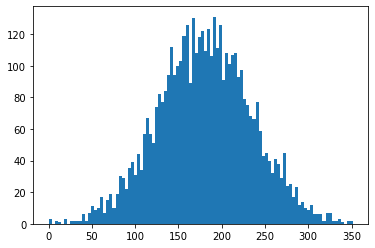

In [19]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Total day minutes'
plt.hist(telecom['Day Mins'], bins = 100)

# Display the plot
plt.show()

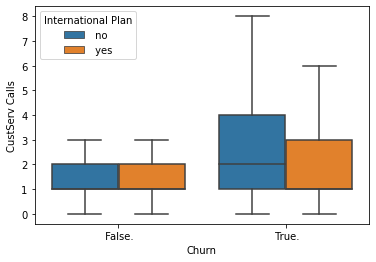

In [22]:
# Create the box plot
sns.boxplot(x = 'Churn',y = 'CustServ Calls',data = telecom,sym = "",hue = "International Plan")
# Display the plot
plt.show()

In [23]:
telecom.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [28]:
telecom.drop(["Phone"], axis=1,inplace=True)

In [29]:
telecom.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [31]:
# Features and Labels
X = telecom.iloc[:, 0:19].values
y = telecom.iloc[:, 19].values # Churn

# Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3])

labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

# Encoding categorical data in y
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [32]:
# Removing extra column to avoid dummy variable trap
X_State = pd.get_dummies(X[:, 0], drop_first = True)

# Converting X to a dataframe
X = pd.DataFrame(X)

# Dropping the 'State' column
X = X.drop([0], axis = 1)

# Merging two dataframes
frames = [X_State, X]
result = pd.concat(frames, axis = 1, ignore_index = True)

# Final dataset with all numeric features
X = result

In [33]:
# Splitting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

In [37]:
# Compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9556277056277056

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[802   5]
 [ 36  81]]
